# Laboratório Feature selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Carregar o dataset Wine
data = load_wine()
X = data.data
y = data.target

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Normalizando os dados para melhorar a convergência da regressão logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [3]:

# 2. Treinando com todos os recursos (sem feature selection)
model_no_fs = LogisticRegression(max_iter=10000, random_state=42)
model_no_fs.fit(X_train_scaled, y_train)
y_pred_no_fs = model_no_fs.predict(X_test_scaled)
acc_no_fs = accuracy_score(y_test, y_pred_no_fs)

# 3. Seleção de características com SelectKBest
select_k_best = SelectKBest(chi2, k=5)  # Seleciona as 5 melhores características
X_train_kbest = select_k_best.fit_transform(X_train, y_train)
X_test_kbest = select_k_best.transform(X_test)

model_kbest = LogisticRegression(max_iter=10000, random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
acc_kbest = accuracy_score(y_test, y_pred_kbest)



In [4]:

# 4. Seleção de características com RFE (Recursive Feature Elimination)
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)  # Usando dados normalizados
X_test_rfe = rfe.transform(X_test_scaled)

model_rfe = LogisticRegression(max_iter=10000, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)


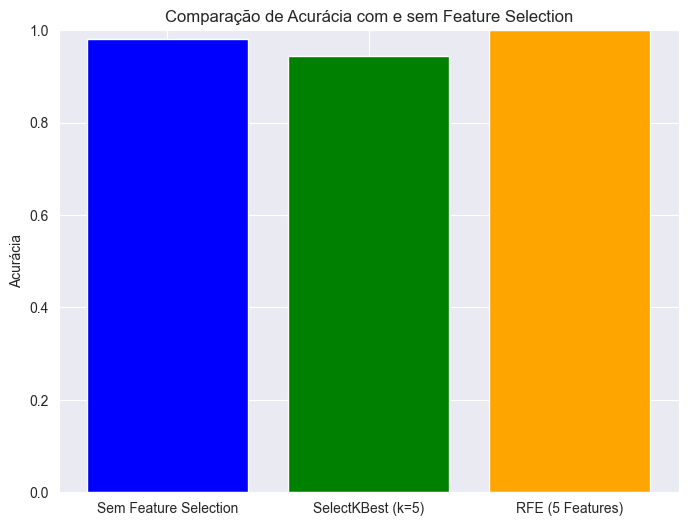

                  Modelo  Acurácia
0  Sem Feature Selection  0.981481
1      SelectKBest (k=5)  0.944444
2       RFE (5 Features)  1.000000


In [5]:

# 5. Comparando acurácias
results = pd.DataFrame({
    'Modelo': ['Sem Feature Selection', 'SelectKBest (k=5)', 'RFE (5 Features)'],
    'Acurácia': [acc_no_fs, acc_kbest, acc_rfe]
})

# Plotando o gráfico comparativo
plt.figure(figsize=(8, 6))
plt.bar(results['Modelo'], results['Acurácia'], color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia com e sem Feature Selection')
plt.show()

# Exibindo os resultados
print(results)

In [6]:
# Testem com o Random Classifier

from sklearn.ensemble import RandomForestClassifier

# 2. Treinando o modelo Random Forest Classifier (sem feature selection)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
feature_importance = rf_model.feature_importances_
importance_indices = np.argsort(feature_importance)[::-1]  # Ordenando as importâncias

# Selecione as 5 características mais importantes
top_5_features = importance_indices[:5]
X_train_top5 = X_train_scaled[:, top_5_features]
X_test_top5 = X_test_scaled[:, top_5_features]

# 5. Treinando novamente o modelo Random Forest com as 5 características mais importantes
rf_model_top5 = RandomForestClassifier(random_state=42)
rf_model_top5.fit(X_train_top5, y_train)
rf_pred_top5 = rf_model_top5.predict(X_test_top5)
rf_acc_top5 = accuracy_score(y_test, rf_pred_top5)

# 6. Comparando os Modelos
# Vamos agora comparar a acurácia dos modelos:
# 1. Random Forest sem feature selection
# 2. Logistic Regression sem feature selection
# 3. Random Forest usando Feature Importance

results = pd.DataFrame({
    'Modelo': ['Random Forest (Sem Feature Selection)', 'Logistic Regression (Sem Feature Selection)',
               'Random Forest (Feature Importance)','SelectKBest (k=5)', 'RFE (5 Features)'],
    'Acurácia': [rf_acc, acc_no_fs, rf_acc_top5, acc_kbest, acc_rfe]
})

print(results)




                                        Modelo  Acurácia
0        Random Forest (Sem Feature Selection)  1.000000
1  Logistic Regression (Sem Feature Selection)  0.981481
2           Random Forest (Feature Importance)  0.981481
3                            SelectKBest (k=5)  0.944444
4                             RFE (5 Features)  1.000000


# Laboratório Cross-Validation

In [7]:
# Parte 1 – Preparação do ambiente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [8]:
# Parte 2 – Carregamento e pré-processamento dos dados
data = load_wine()
X = data.data
y = data.target

In [9]:
# Parte 3. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Parte 4. Padronizar -- testar diferentes normalizações!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Parte 5. Criar modelo
model = LogisticRegression(max_iter=10000)

In [12]:
# Parte 6. Aplicar cross-validation APENAS no treino
#sem treino e teste
#cv_scores = cross_val_score(model, X, y, cv=5)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Acurácias na validação cruzada (treino):", cv_scores)

print("Média da validação cruzada:", cv_scores.mean())
print("Desvio padrão da validação cruzada:", cv_scores.std())

Acurácias na validação cruzada (treino): [0.96551724 0.96551724 1.         0.96428571 1.        ]
Média da validação cruzada: 0.9790640394088671
Desvio padrão da validação cruzada: 0.01710005414552686


In [13]:
# Parte 7. Treinar no treino completo
model.fit(X_train_scaled, y_train)

# Parte 8. Avaliar no teste
test_accuracy = model.score(X_test_scaled, y_test)

In [14]:
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de teste: 1.0


In [15]:
#Testando sem validação
model.fit(X, y)
test_accuracy = model.score(X, y)

In [16]:
print("Acurácia no conjunto de teste:", test_accuracy)

Acurácia no conjunto de teste: 0.9943820224719101


In [17]:
# 5. Definir os hiperparâmetros a serem testados
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# 6. Aplicar GridSearchCV somente no treino
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [18]:
# 7. Avaliar o melhor modelo no teste
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)

# 8. Resultados
print("Melhor hiperparâmetro:", grid.best_params_)
print("Score médio na validação cruzada:", grid.best_score_)
print("Acurácia final no teste:", test_accuracy)

Melhor hiperparâmetro: {'C': 0.1}
Score médio na validação cruzada: 0.9928571428571429
Acurácia final no teste: 1.0


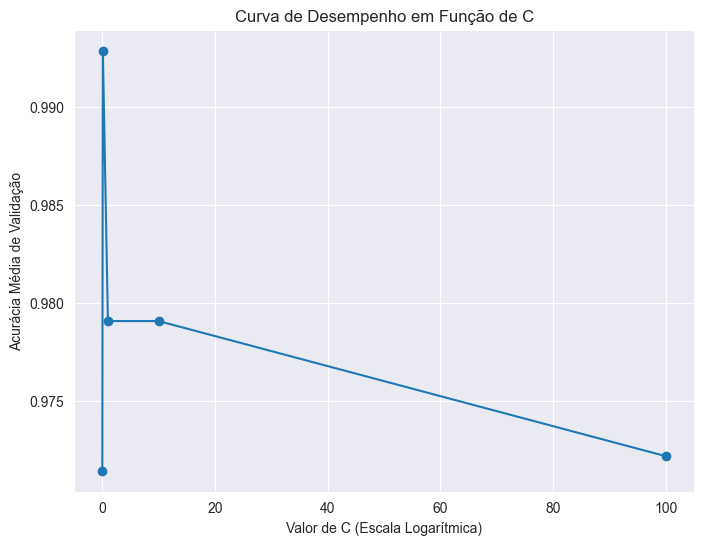

In [19]:
# Plotando a curva de desempenho em função de C
plt.figure(figsize=(8, 6))
plt.plot(param_grid['C'], grid.cv_results_['mean_test_score'], marker='o')
#plt.xscale('log')  # Usando escala logarítmica no eixo x
plt.xlabel('Valor de C (Escala Logarítmica)')
plt.ylabel('Acurácia Média de Validação')
plt.title('Curva de Desempenho em Função de C')
plt.grid(True)
plt.show()

In [20]:
# Exercício 1: Divisão de dados

# Divida o dataset data = load_breast_cancer() em 60% treino, 20% validação e 20% teste.
# Dica: use train_test_split duas vezes.

data = load_breast_cancer()
X2 = data.data
y2 = data.target

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=42)


In [21]:
# Exercício 2:
# Utilize cross_val_score com K=3 para avaliar um modelo LogisticRegression.
# Registre a média e o desvio-padrão das acurácias.

model2 = LogisticRegression(max_iter=10000)
model2.fit(X_train2, y_train2)

cv_scores2 = cross_val_score(model2, X_val2, y_val2, cv=3)

print(f'Média = {cv_scores2.mean():.2f}')
print(f'DP = {cv_scores2.std():.2f}')

Média = 0.91
DP = 0.01


In [22]:
# Exercício 3:
# Execute um GridSearchCV com C = [0.01, 0.1, 1, 10] e K=3 folds.
# Qual foi o melhor valor de C?

param_grid2 = {'C': [0.01, 0.1, 1, 10]}

grid2 = GridSearchCV(model2, param_grid2, cv=3)
grid2.fit(X_train2, y_train2)

# 7. Avaliar o melhor modelo no teste
best_model2 = grid2.best_estimator_
y_pred2 = best_model2.predict(X_test2)
test_accuracy2 = accuracy_score(y_test2, y_pred2)

# 8. Resultados
print("Melhor hiperparâmetro:", grid2.best_params_)
print(f"Score médio na validação cruzada: {100 * grid2.best_score_:.2f}%")
print(f"Acurácia final no teste: {100 * test_accuracy2:.2f}%")

Melhor hiperparâmetro: {'C': 10}
Score médio na validação cruzada: 96.48%
Acurácia final no teste: 95.61%
